# Sampling Distributions

The samples you choose may result in different means, standard deviations, variance, etc..  Sampling Distributions are the distribution of a statistic (any statistic).

In [2]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

## Law of Large Numbers

* The larger the sample size, the closer our statistic gets to the parameter.
* Let's say we have a population of 10,000.  A sample size of 5,000 will produce a statistic that is closer to the parameter's value than a sample size of 1,000.

In [15]:
np.random.seed(42)
large_data = np.random.gamma(1,100,3000)

small_sample = np.random.choice(large_data, size=100)
large_sample = np.random.choice(large_data, size=2000)

print("Small sample mean:", small_sample.mean())
print("Large sample mean:", large_sample.mean())
print("Population mean:", large_data.mean())

Small sample mean: 115.897604808
Large sample mean: 103.246580085
Population mean: 100.359787008


## Central Limit Theorem

* "The Central Limit Theorem states that with a large enough sample size the sampling distribution of the mean will be normally distributed."
* This theorem applies for Sample means, Sample proportions, Difference in sample means, Difference in sample proportions.
* The course went through an exercise where we generated 1,000 random values and considered this the population:
    * We then sampled this population 1,000 times taking three values each time and calculating the mean.  The histogram for these 1,000 means was not normally distributed.
    * We then sampled this population 10,000 times taking 100 values each time and calculating the mean.  The histogram for these 10,000 means was indeed normally distributed.

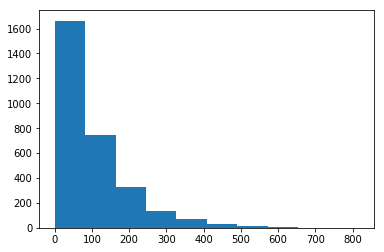

In [3]:
# this is the simulated data:
np.random.seed(42)
pop_data = np.random.gamma(1,100,3000)
plt.hist(pop_data);

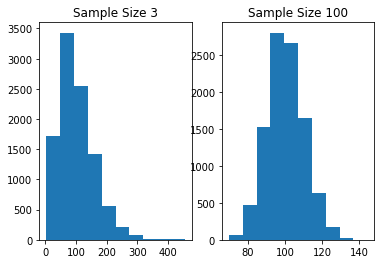

In [9]:
# now, let's take samples 10,000 times.
# in once case, we'll sample only three values.  in the other, we'll sample 100 values.

means_size_3 = []
means_size_100 = []

for _ in range(0, 10000):
    means_size_100.append(
        np.random.choice(pop_data, 100).mean()
    )
    means_size_3.append(
        np.random.choice(pop_data, 3).mean()
    )

# https://stackoverflow.com/questions/42818361/how-to-make-two-plots-side-by-side-using-python
plt.subplot(1, 2, 1)
plt.title('Sample Size 3')
plt.hist(means_size_3)
plt.subplot(1, 2, 2)
plt.title('Sample Size 100')
plt.hist(means_size_100);

* In the "Sample Size 3" graph, note how the sampling distribution of the mean is not normally distributed.  Our sample size is too small.
* In the "Sample Size 100" graph, the sampling distribution of the mean is normally distributed.  Our sample size of 100 is good enough.

## Bootstrapping

Bootstrapping is sampling with replacement.  So, you pick a value then there's a chance you will pick it again.  We can infer information about the population by resampling.

Here's a nice [overview of bootstrapping](https://stats.stackexchange.com/questions/26088/explaining-to-laypeople-why-bootstrapping-works).

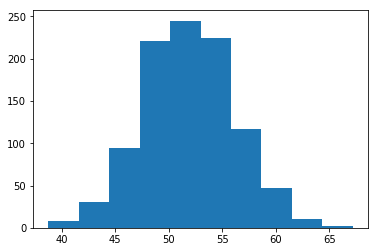

In [21]:
np.random.seed(16)

raw = np.random.randint(1, 100, size=20)

raw_means = []
for _ in range(1000):
    # np.random.choice automatically replaces so we've been
    # doing bootstrapping all along.
    raw_means.append(np.random.choice(raw, size=37).mean())
    
plt.hist(raw_means);